<a href="https://colab.research.google.com/github/bu11ymaguire/Machin-Learning1/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import os


In [3]:
# Google Drive 마운트 시
file_path = '/content/drive/MyDrive/koreaTrip.csv' # 실제 파일 경로로 변경
df = pd.read_csv(file_path)


Data Preview:
  시간(연도.월)       관광객수 1인당 평균 지출(USD$) 관광수입(1K USD$)    입국자 수  서울 평균 기온  \
0   Jan-15    723,255           1,014     1,230,500  917,054       3.6   
1   Feb-15    815,138            1066       1221300  1050706       6.0   
2   Mar-15    958,493            1202       1561500  1238144      12.4   
3   Apr-15  1,112,904            1241       1499600  1384567      18.8   
4   May-15  1,060,730            1088       1485500  1334212      24.9   

   부산 평균 기온  제주 평균 기온  서울(경기) 평균 강수일수  부산(경남) 평균 강수일수  ...  "여행 한국"(구글트랜드_태국)  \
0       9.4      10.2             7.0             8.9  ...                 81   
1      10.2      10.1             5.7             5.5  ...                 61   
2      14.3      13.6             3.7             5.8  ...                 68   
3      17.8      19.2            11.5            15.3  ...                 66   
4      22.9      22.7             5.8             7.9  ...                 62   

   "서울 한국"(구글트랜드_태국)  "한국 가기"(구글트랜드_태국)  환율(USD-KRW) 

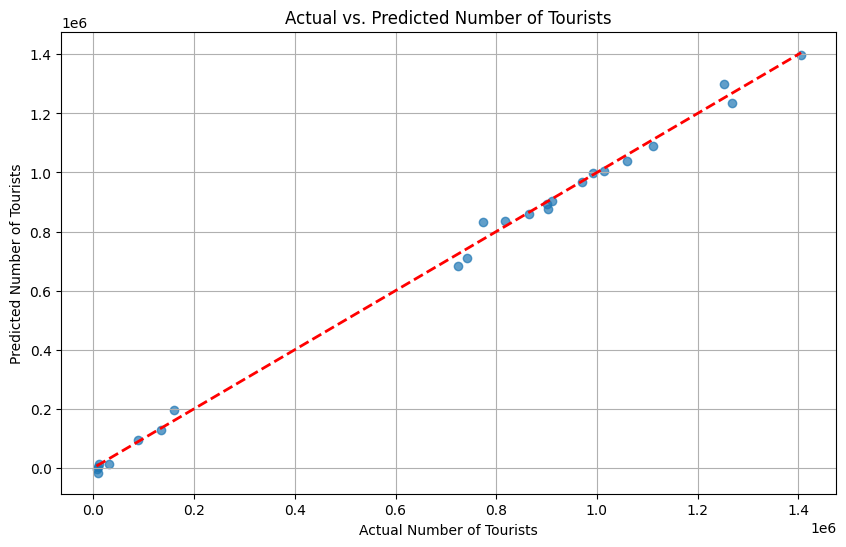

In [4]:
if 'df' in locals() and not df.empty:
    print("\nData Preview:")
    print(df.head())
    print("\nData Info:")
    df.info()
    print("\nMissing Values:")
    print(df.isnull().sum())

    # 4.1 Column Name Cleaning
    # Remove quotes and extra spaces
    df.columns = df.columns.str.replace('"', '').str.strip()
    print("\nCleaned Column Names:")
    print(df.columns.tolist())

    # Map Korean column names to English for consistency
    column_mapping = {
        '시간(연도.월)': 'Date',
        '관광객수': 'Number of Tourists',
        '1인당 평균 지출(USD$)': 'Avg Spend per Person (USD)',
        '관광수입(1K USD$)': 'Tourism Revenue (1K USD)',
        '입국자 수': 'Number of Arrivals',
        '서울 평균 기온': 'Seoul Avg Temp',
        '부산 평균 기온': 'Busan Avg Temp',
        '제주 평균 기온': 'Jeju Avg Temp',
        '서울(경기) 평균 강수일수': 'Seoul Avg Rainy Days',
        '부산(경남) 평균 강수일수': 'Busan Avg Rainy Days',
        '제주 평균 강수일수': 'Jeju Avg Rainy Days',
        '공휴일': 'Holidays',
        '항공편(인천국제공항_도착여객기)': 'Incheon Airport Arrivals',
        '한국(구글트랜드_미국)': 'Korea_GoogleTrend_US',
        '서울(구글트랜드_미국)': 'Seoul_GoogleTrend_US',
        '서울 여행(구글트랜드_미국)': 'Seoul Travel_GoogleTrend_US',
        '한국 여행(구글트랜드_미국)': 'Korea Travel_GoogleTrend_US',
        'k-pop(구글트랜드_미국)': 'K-pop_GoogleTrend_US',
        '한국 여행(구글트랜드_일본)': 'Korea Travel_GoogleTrend_JP',
        '서울 관광(구글트랜드_일본)': 'Seoul Tourism_GoogleTrend_JP',
        '부산 여행(구글트랜드_일본)': 'Busan Travel_GoogleTrend_JP',
        '여행 한국(구글트랜드_태국)': 'Travel Korea_GoogleTrend_TH',
        '서울 한국(구글트랜드_태국)': 'Seoul Korea_GoogleTrend_TH',
        '한국 가기(구글트랜드_태국)': 'Go to Korea_GoogleTrend_TH',
        '환율(USD-KRW)': 'Exchange Rate (USD-KRW)',
        '교통 인프라(지하철_연간)': 'Transport Infra (Subway_Annual)',
        '면세점_외국인 결제 데이터(단위수: 1M USD$)': 'Duty-Free_Foreigner Payment (1M USD)',
        '면세점_외국인_인원수(단위 수 천명)': 'Duty-Free_Foreigner Count (1K ppl)',
        '서부텍사스산_원유(WTI) (단위 수: 1 USD$)': 'WTI Crude Oil (USD)',
        '팬데믹': 'Pandemic',
        '한국- 전국소비자 물가지수': 'Korea National CPI'
    }
    df.rename(columns=column_mapping, inplace=True)
    print("\nColumns renamed to English for consistency.")
    print(df.columns.tolist())


    # 4.2 Convert 'Date' column to datetime
    try:
        df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
        print("\n'Date' column converted to datetime format.")
        print(df['Date'].head())
    except Exception as e:
        print(f"Error converting Date column: {e}")

    # 4.3 Clean and Convert Numeric Data Types
    numeric_cols_to_clean = [
        'Number of Tourists', 'Avg Spend per Person (USD)', 'Tourism Revenue (1K USD)', 'Number of Arrivals',
        'Incheon Airport Arrivals', 'Exchange Rate (USD-KRW)', 'Transport Infra (Subway_Annual)',
        'Duty-Free_Foreigner Payment (1M USD)', 'Duty-Free_Foreigner Count (1K ppl)',
        'WTI Crude Oil (USD)', 'Korea National CPI'
    ]

    for col in numeric_cols_to_clean:
        if col in df.columns:
            df[col] = df[col].astype(str).str.replace(',', '').str.strip()
            df[col] = pd.to_numeric(df[col], errors='coerce')
        else:
            print(f"Warning: Column '{col}' does not exist in data.")

    # 4.4 Handle Missing Values (Example: Median for numeric, Mode for categorical)
    for col in df.columns:
        if df[col].isnull().any():
            if pd.api.types.is_numeric_dtype(df[col]):
                df[col].fillna(df[col].median(), inplace=True)
                print(f"Missing values in '{col}' replaced with median.")
            elif pd.api.types.is_object_dtype(df[col]):
                df[col].fillna(df[col].mode()[0], inplace=True)
                print(f"Missing values in '{col}' replaced with mode.")
            else:
                print(f"Warning: Missing value handling for '{col}' is not defined.")

    # Check info again after preprocessing
    print("\nData Info after Preprocessing:")
    df.info()
    print("\nMissing Values after Preprocessing:")
    print(df.isnull().sum())
    print("\nData Preview after Preprocessing:")
    print(df.head())

    # Handle 'Pandemic' column
    if 'Pandemic' in df.columns and pd.api.types.is_numeric_dtype(df['Pandemic']):
        # Assume pandemic period from March 2020 to March 2022 (adjust as per data)
        df['Pandemic'] = ((df['Date'] >= '2020-03-01') & (df['Date'] <= '2022-03-31')).astype(int)
        print("\n'Pandemic' column updated.")
        print(df['Pandemic'].value_counts())
    elif 'Pandemic' in df.columns:
        print(f"Warning: 'Pandemic' column data type is not as expected: {df['Pandemic'].dtype}. Please check manually.")

    # Generate additional features (e.g., Year, Month)
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    print("\n'Year' and 'Month' columns created.")
    print(df[['Date', 'Year', 'Month']].head())

else:
    print("DataFrame is empty or not created, skipping preprocessing steps.")

# 5. Set Features (X) and Target (y) Variables
target_column = 'Number of Tourists'
if 'df' in locals() and not df.empty and target_column in df.columns:
    y = df[target_column]

    # Exclude 'Date' and the target column from features
    features = [col for col in df.columns if col not in ['Date', target_column]]
    X = df[features].select_dtypes(include=np.number) # Select only numeric features

    print(f"\nTarget Variable: {target_column}")
    print(f"Feature Variables (numeric): {X.columns.tolist()}")
    print(f"X shape: {X.shape}, y shape: {y.shape}")

    # Double check for any remaining missing values in X and y
    if X.isnull().any().any():
        print("\nWarning: Missing values still exist in feature variables (X). Further processing might be needed:")
        print(X.isnull().sum()[X.isnull().sum() > 0])
    if y.isnull().any():
        print("\nWarning: Missing values still exist in target variable (y). Further processing might be needed:")
        print(y.isnull().sum())
else:
    print("Skipping target variable setup or feature extraction. Ensure DataFrame and essential columns are correctly set.")

# 6. Split Data (Training and Test Sets)
if 'X' in locals() and 'y' in locals() and not X.empty and not y.empty:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\nTraining set size (X_train, y_train): {X_train.shape}, {y_train.shape}")
    print(f"Test set size (X_test, y_test): {X_test.shape}, {y_test.shape}")
else:
    print("Skipping data splitting. Ensure X and y variables are set correctly.")

# 7. Scaling (Optional but Recommended)
if 'X_train' in locals() and not X_train.empty:
    scaler = StandardScaler() # Or MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("\nData scaling completed.")
    print(f"Scaled training set (X_train_scaled) shape: {X_train_scaled.shape}")
    print(f"Scaled test set (X_test_scaled) shape: {X_test_scaled.shape}")
else:
    print("Skipping scaling. Ensure training data is set correctly.")

# Example: Train a simple Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

if 'X_train_scaled' in locals() and 'y_train' in locals() and 'X_test_scaled' in locals() and 'y_test' in locals():
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nLinear Regression Model Results:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2 Score): {r2:.2f}")

    # Visualize predictions (all text in English)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Number of Tourists")
    plt.ylabel("Predicted Number of Tourists")
    plt.title("Actual vs. Predicted Number of Tourists")
    plt.grid(True)
    plt.show()
else:
    print("Skipping model training. Ensure scaled data and target variable are set correctly.")

--- Linear Regression Model Coefficients ---
                                 Feature    Coefficient
2                     Number of Arrivals  443333.219567
29                                  Year  131104.497328
3                         Seoul Avg Temp   63988.848768
25    Duty-Free_Foreigner Count (1K ppl)   52904.732109
30                                 Month   21665.321860
20            Seoul Korea_GoogleTrend_TH   19968.103565
7                   Busan Avg Rainy Days    8795.337454
1               Tourism Revenue (1K USD)    7643.657990
11                  Korea_GoogleTrend_US    6571.883237
6                   Seoul Avg Rainy Days    5696.696277
15                  K-pop_GoogleTrend_US    1721.278761
18           Busan Travel_GoogleTrend_JP    1091.906936
12                  Seoul_GoogleTrend_US     927.033809
21            Go to Korea_GoogleTrend_TH     654.669643
16           Korea Travel_GoogleTrend_JP   -1276.683309
17          Seoul Tourism_GoogleTrend_JP   -2303.282535
9  

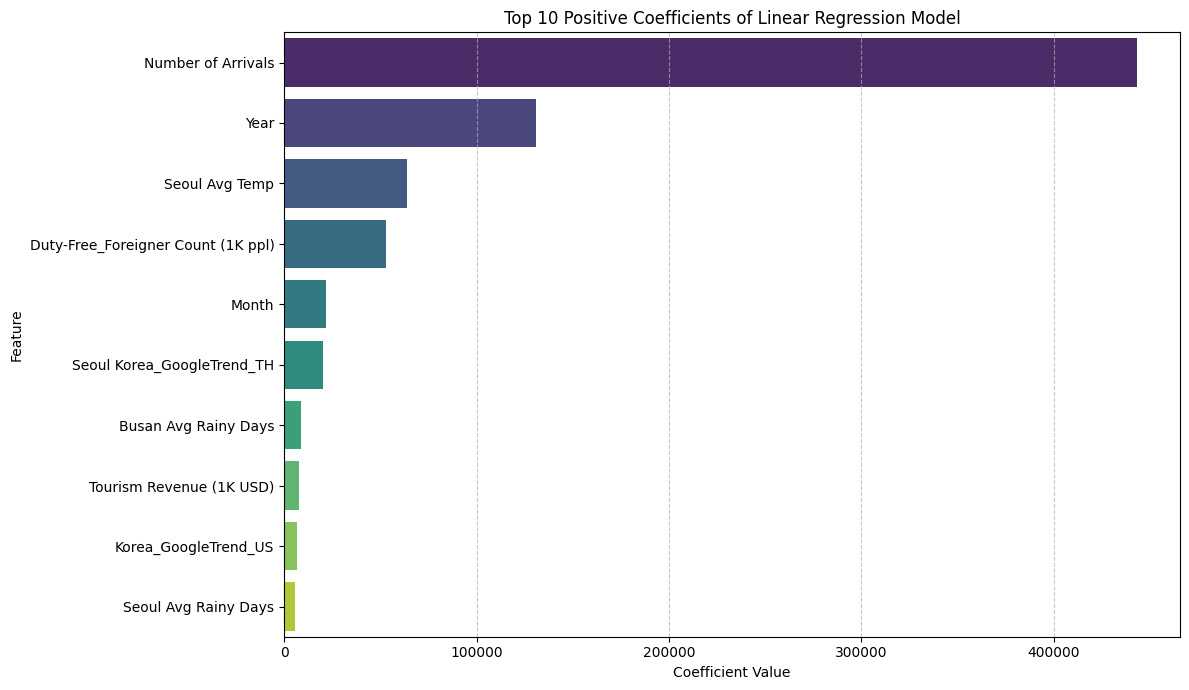

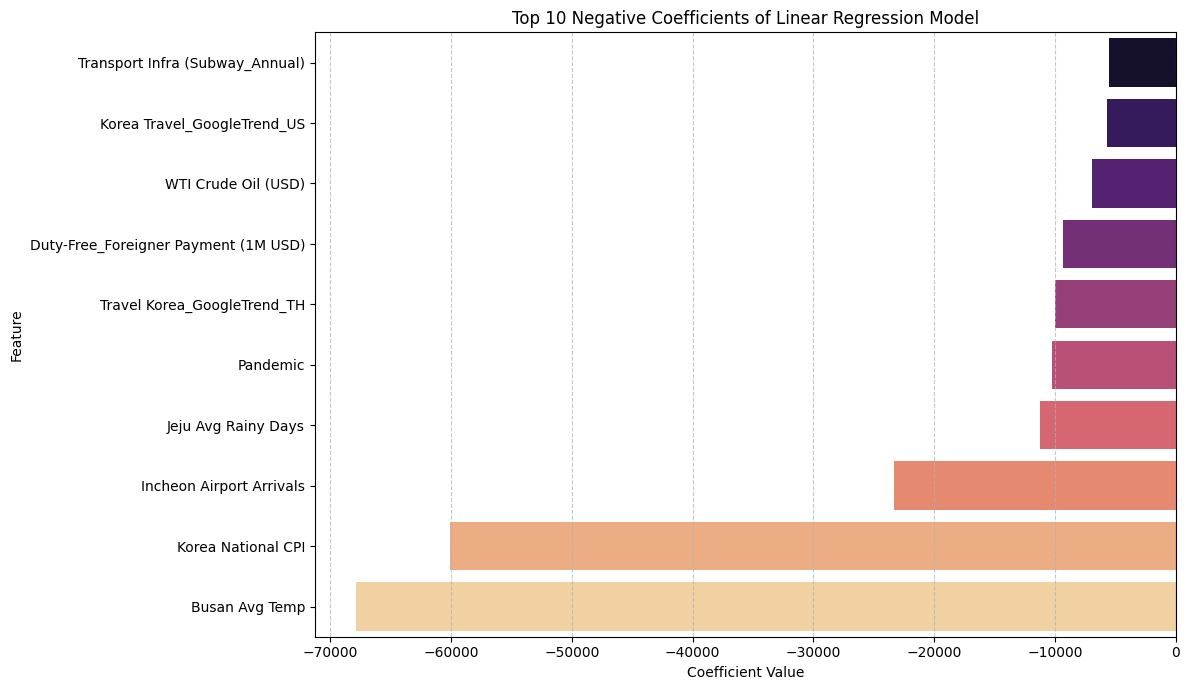


Interpretation Notes:
- The coefficients represent the change in the 'Number of Tourists' for a one-unit change in the corresponding feature, holding other features constant.
- Since features were scaled using StandardScaler, the magnitude of the coefficient indicates the relative importance of the feature.
- A positive coefficient means an increase in the feature leads to an increase in the number of tourists.
- A negative coefficient means an increase in the feature leads to a decrease in the number of tourists.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'model' and 'X' (original feature DataFrame) are defined from previous cells.
# If not, you'll need to run the preceding data loading, preprocessing, and model training cells first.

print("--- Linear Regression Model Coefficients ---")

# Create a DataFrame of coefficients
# X.columns contains the names of the original features before scaling
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

# Visualize Top 10 Positive Coefficients
plt.figure(figsize=(12, 7))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(10), palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Positive Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize Top 10 Negative Coefficients
plt.figure(figsize=(12, 7))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.tail(10), palette='magma', hue='Feature', legend=False)
plt.title('Top 10 Negative Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nInterpretation Notes:")
print("- The coefficients represent the change in the 'Number of Tourists' for a one-unit change in the corresponding feature, holding other features constant.")
print("- Since features were scaled using StandardScaler, the magnitude of the coefficient indicates the relative importance of the feature.")
print("- A positive coefficient means an increase in the feature leads to an increase in the number of tourists.")
print("- A negative coefficient means an increase in the feature leads to a decrease in the number of tourists.")

In [8]:
!pip uninstall statsmodels -y
!pip install statsmodels
# !pip install --upgrade statsmodels # 필요한 경우 (최신 버전으로 업데이트)

Found existing installation: statsmodels 0.14.4
Uninstalling statsmodels-0.14.4:
  Successfully uninstalled statsmodels-0.14.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 26.2 MB/s eta 0:00:00


--- Residual Analysis ---


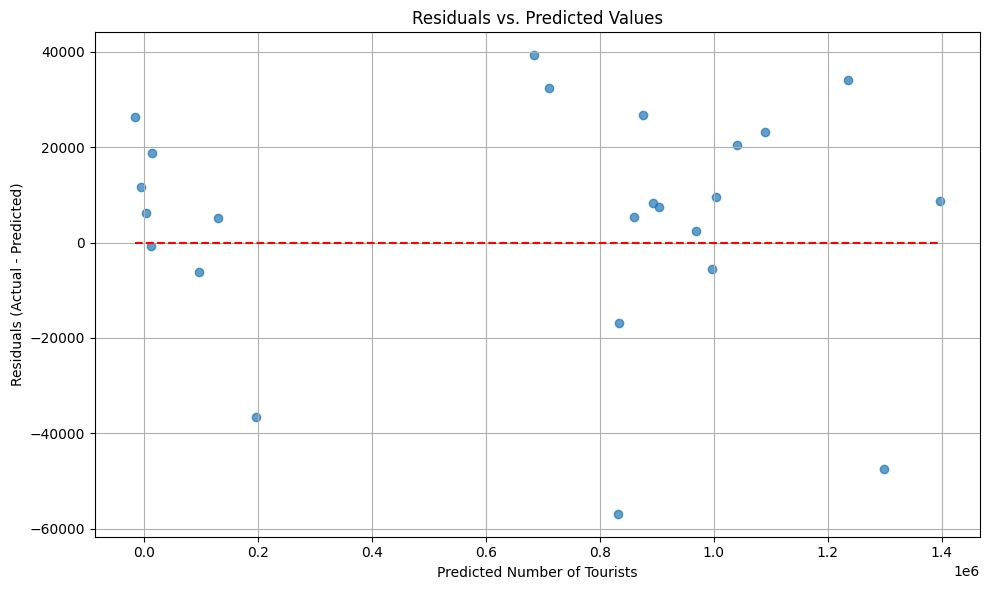


Interpretation for Residuals vs. Predicted Values Plot:
- Ideally, residuals should be randomly scattered around zero, with no discernible pattern.
- A pattern (e.g., a curve, a funnel shape) indicates that the linear model might not be appropriate (non-linearity) or that residuals variance is not constant (heteroscedasticity).


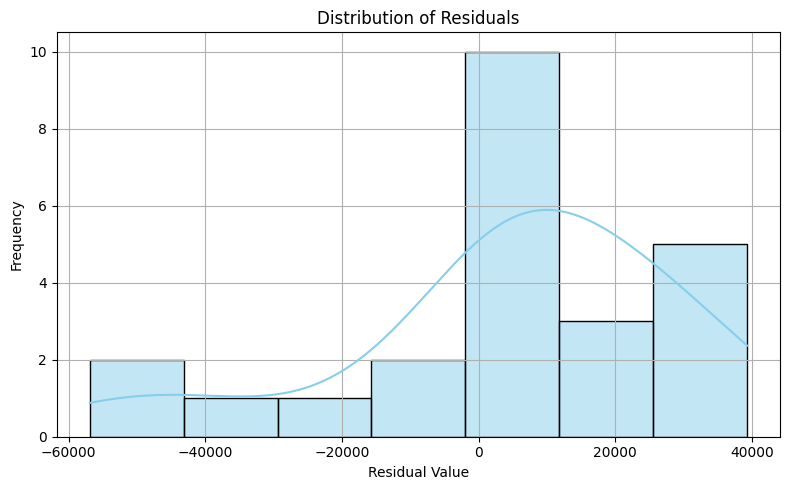


Interpretation for Distribution of Residuals Plot:
- Ideally, residuals should be normally distributed around zero (bell-shaped curve).
- Deviations from normality (e.g., skewed distribution, multiple peaks) might indicate issues like outliers or missing variables.


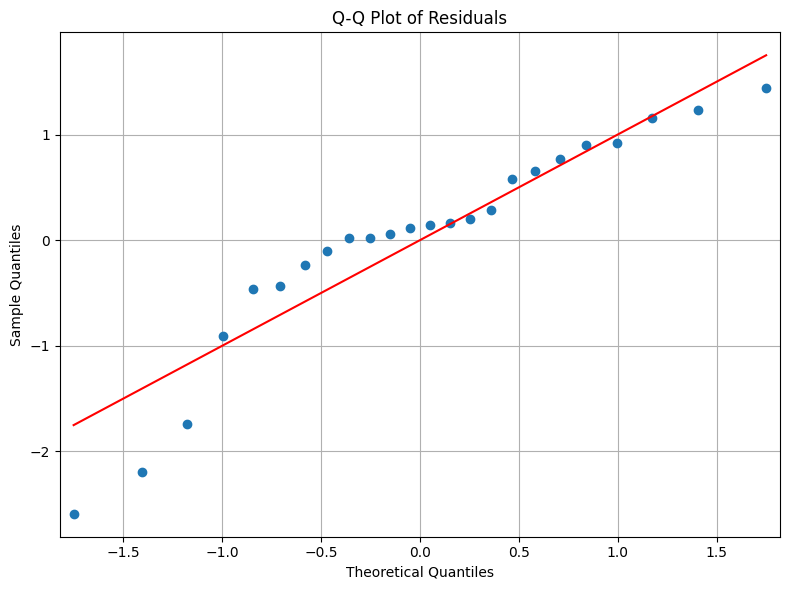


Interpretation for Q-Q Plot of Residuals:
- If the residuals are normally distributed, the points will closely follow the straight line.
- Deviations from the line, especially at the tails, suggest non-normality.

Residuals Mean: 4833.18
Residuals Standard Deviation: 24343.26

--- Residual Analysis Complete ---


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Make sure 'y_test' and 'y_pred' are defined from previous cells.

print("--- Residual Analysis ---")

# Calculate residuals
residuals = y_test - y_pred

# Plot 1: Residuals vs. Predicted Values
# Checks for linearity and homoscedasticity (constant variance of residuals)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel("Predicted Number of Tourists")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nInterpretation for Residuals vs. Predicted Values Plot:")
print("- Ideally, residuals should be randomly scattered around zero, with no discernible pattern.")
print("- A pattern (e.g., a curve, a funnel shape) indicates that the linear model might not be appropriate (non-linearity) or that residuals variance is not constant (heteroscedasticity).")

# Plot 2: Distribution of Residuals
# Checks for normality of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nInterpretation for Distribution of Residuals Plot:")
print("- Ideally, residuals should be normally distributed around zero (bell-shaped curve).")
print("- Deviations from normality (e.g., skewed distribution, multiple peaks) might indicate issues like outliers or missing variables.")

# Plot 3: Q-Q Plot of Residuals
# A more formal check for normality
plt.figure(figsize=(8, 6))
# Using ax=plt.gca() ensures the plot is drawn on the current axes
sm.qqplot(residuals, line='s', ax=plt.gca(), fit=True) # 's' for standardized line, fit=True fits line to data
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nInterpretation for Q-Q Plot of Residuals:")
print("- If the residuals are normally distributed, the points will closely follow the straight line.")
print("- Deviations from the line, especially at the tails, suggest non-normality.")

# Calculate basic statistics of residuals
print(f"\nResiduals Mean: {residuals.mean():.2f}")
print(f"Residuals Standard Deviation: {residuals.std():.2f}")

print("\n--- Residual Analysis Complete ---")

--- Re-evaluating Features: Excluding 'Number of Arrivals' ---
New Feature Variables (numeric): ['Avg Spend per Person (USD)', 'Tourism Revenue (1K USD)', 'Seoul Avg Temp', 'Busan Avg Temp', 'Jeju Avg Temp', 'Seoul Avg Rainy Days', 'Busan Avg Rainy Days', 'Jeju Avg Rainy Days', 'Holidays', 'Incheon Airport Arrivals', 'Korea_GoogleTrend_US', 'Seoul_GoogleTrend_US', 'Seoul Travel_GoogleTrend_US', 'Korea Travel_GoogleTrend_US', 'K-pop_GoogleTrend_US', 'Korea Travel_GoogleTrend_JP', 'Seoul Tourism_GoogleTrend_JP', 'Busan Travel_GoogleTrend_JP', 'Travel Korea_GoogleTrend_TH', 'Seoul Korea_GoogleTrend_TH', 'Go to Korea_GoogleTrend_TH', 'Exchange Rate (USD-KRW)', 'Transport Infra (Subway_Annual)', 'Duty-Free_Foreigner Payment (1M USD)', 'Duty-Free_Foreigner Count (1K ppl)', 'WTI Crude Oil (USD)', 'Pandemic', 'Korea National CPI', 'Year', 'Month']
New X shape: (120, 30), New y shape: (120,)

--- Training and Evaluating Different Regression Models ---

--- Training Linear Regression (No Arrival

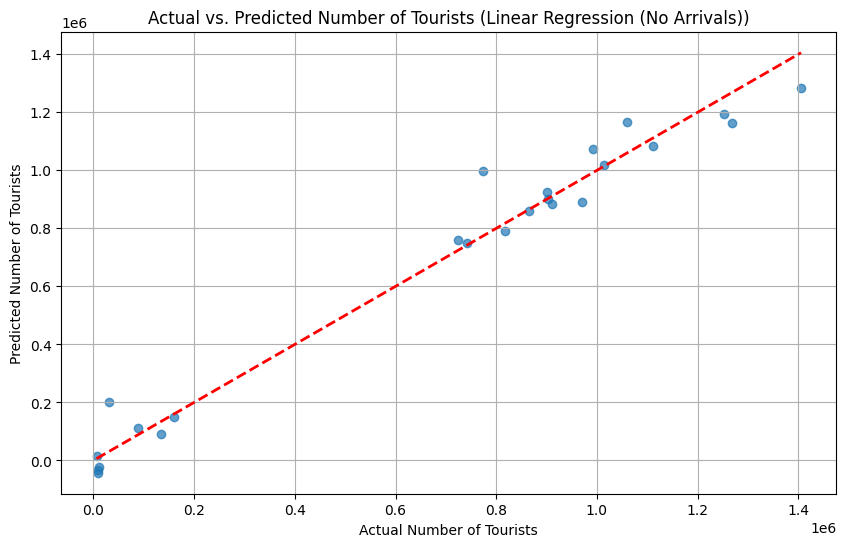


--- Training Random Forest Regressor ---
Model: Random Forest Regressor
Mean Squared Error (MSE): 13926891624.20
R-squared (R2 Score): 0.94


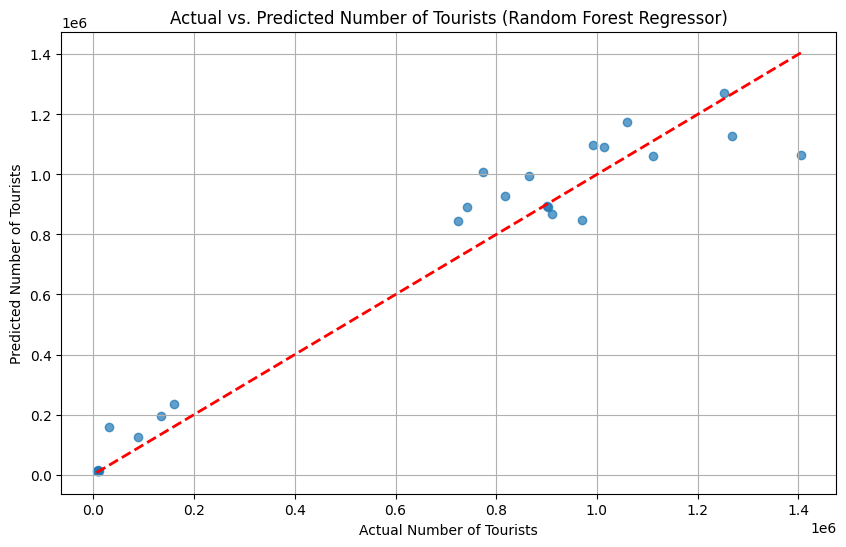


--- Training Gradient Boosting Regressor ---
Model: Gradient Boosting Regressor
Mean Squared Error (MSE): 10328937635.67
R-squared (R2 Score): 0.95


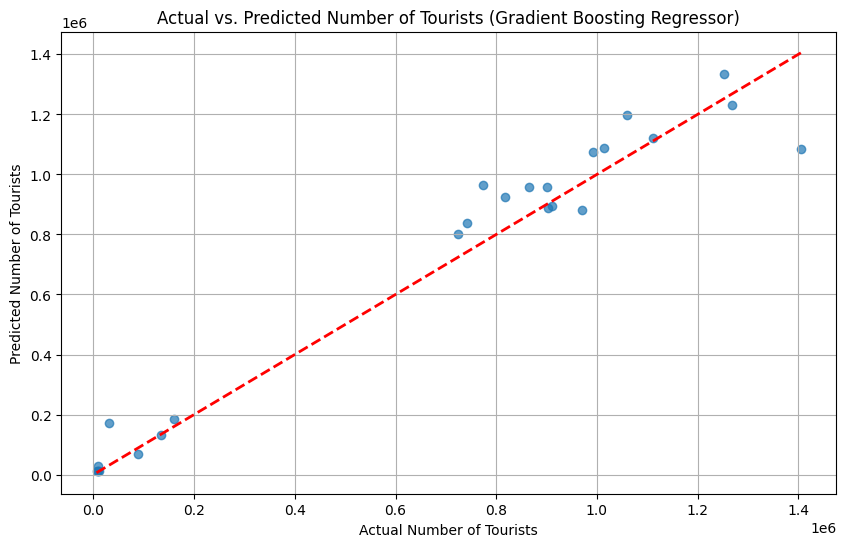


--- Training Support Vector Regressor ---
Model: Support Vector Regressor
Mean Squared Error (MSE): 255781760564.85
R-squared (R2 Score): -0.18


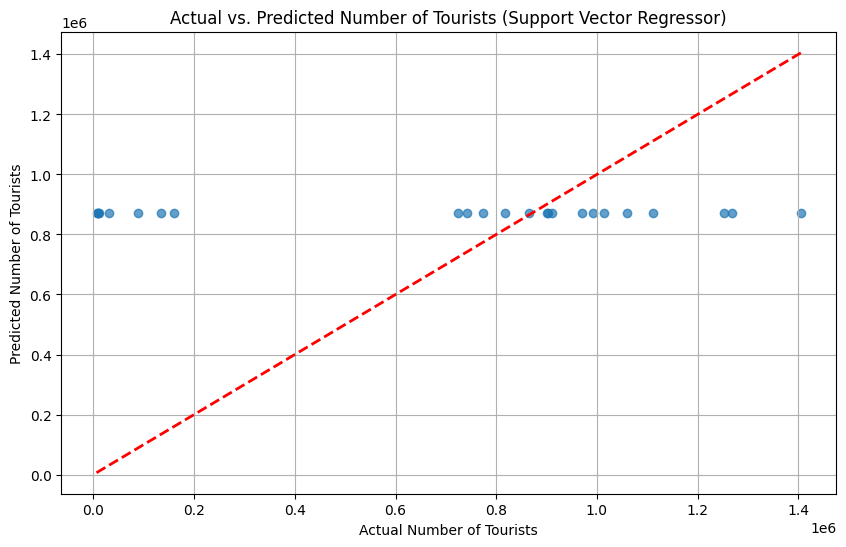


--- Summary of Model Performances ---
                                          MSE  R2 Score
Linear Regression (No Arrivals)  6.035865e+09  0.972055
Gradient Boosting Regressor      1.032894e+10  0.952179
Random Forest Regressor          1.392689e+10  0.935521
Support Vector Regressor         2.557818e+11 -0.184217

--- K-Fold Cross-Validation Evaluation ---

--- Cross-Validating Linear Regression (No Arrivals) ---
Linear Regression (No Arrivals) - Mean R2 Score: 0.9726 (Std: 0.0072)
Linear Regression (No Arrivals) - Mean MSE: 5898725668.81 (Std: 1420729467.14)

--- Cross-Validating Random Forest Regressor ---
Random Forest Regressor - Mean R2 Score: 0.9465 (Std: 0.0305)
Random Forest Regressor - Mean MSE: 11178264195.84 (Std: 5783467993.75)

--- Cross-Validating Gradient Boosting Regressor ---
Gradient Boosting Regressor - Mean R2 Score: 0.9592 (Std: 0.0220)
Gradient Boosting Regressor - Mean MSE: 8550346354.46 (Std: 4295370778.14)

--- Cross-Validating Support Vector Regressor ---


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df, target_column, X, y, X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled are defined
# from previous data loading, preprocessing, and splitting cells.
# If running this block independently, you need to execute the full preceding script first.

# --- Step 1: Exclude 'Number of Arrivals' from features ---
print("--- Re-evaluating Features: Excluding 'Number of Arrivals' ---")

# Define the new set of features, excluding 'Number of Arrivals'
# Also exclude 'Date', 'Year', 'Month' if not intended as direct features for non-time-series models,
# but for now, we'll keep Year/Month as numerical features, focusing on 'Number of Arrivals'.
# If 'Number of Tourists' is also in the original features list, exclude it as well.
excluded_cols_for_features = ['Date', 'Number of Tourists', 'Number of Arrivals']

# Filter X to exclude 'Number of Arrivals'
X_new = df[[col for col in df.columns if col not in excluded_cols_for_features]].select_dtypes(include=np.number)
y_new = df[target_column] # Target remains the same

print(f"New Feature Variables (numeric): {X_new.columns.tolist()}")
print(f"New X shape: {X_new.shape}, New y shape: {y_new.shape}")

# Re-split data with new features
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Re-scale data with new features
scaler_new = StandardScaler()
X_train_scaled_new = scaler_new.fit_transform(X_train_new)
X_test_scaled_new = scaler_new.transform(X_test_new)

print("\n--- Training and Evaluating Different Regression Models ---")

# Initialize models
models = {
    'Linear Regression (No Arrivals)': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR() # SVR can be very slow on large datasets, might need scaling/tuning
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train_scaled_new, y_train_new)
    y_pred = model.predict(X_test_scaled_new)

    mse = mean_squared_error(y_test_new, y_pred)
    r2 = r2_score(y_test_new, y_pred)

    results[name] = {'MSE': mse, 'R2 Score': r2}

    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2 Score): {r2:.2f}")

    # Optional: Plotting predictions for each model (can be commented out if too many plots)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_new, y_pred, alpha=0.7)
    plt.plot([y_test_new.min(), y_test_new.max()], [y_test_new.min(), y_test_new.max()], 'r--', lw=2)
    plt.xlabel("Actual Number of Tourists")
    plt.ylabel("Predicted Number of Tourists")
    plt.title(f"Actual vs. Predicted Number of Tourists ({name})")
    plt.grid(True)
    plt.show()

print("\n--- Summary of Model Performances ---")
results_df = pd.DataFrame(results).T # Transpose to have models as index
print(results_df.sort_values(by='R2 Score', ascending=False))

# --- Step 2: Incorporate K-Fold Cross-Validation for robust evaluation ---
print("\n--- K-Fold Cross-Validation Evaluation ---")

kf = KFold(n_splits=5, shuffle=True, random_state=42) # 5-fold cross-validation

cv_results = {}

for name, model in models.items():
    print(f"\n--- Cross-Validating {name} ---")
    mse_scores = []
    r2_scores = []

    for train_index, val_index in kf.split(X_new):
        X_train_fold, X_val_fold = X_new.iloc[train_index], X_new.iloc[val_index]
        y_train_fold, y_val_fold = y_new.iloc[train_index], y_new.iloc[val_index]

        # Apply scaling within each fold
        scaler_fold = StandardScaler()
        X_train_scaled_fold = scaler_fold.fit_transform(X_train_fold)
        X_val_scaled_fold = scaler_fold.transform(X_val_fold)

        model.fit(X_train_scaled_fold, y_train_fold)
        y_pred_fold = model.predict(X_val_scaled_fold)

        mse_scores.append(mean_squared_error(y_val_fold, y_pred_fold))
        r2_scores.append(r2_score(y_val_fold, y_pred_fold))

    cv_results[name] = {
        'Mean MSE': np.mean(mse_scores),
        'Std MSE': np.std(mse_scores),
        'Mean R2 Score': np.mean(r2_scores),
        'Std R2 Score': np.std(r2_scores)
    }
    print(f"{name} - Mean R2 Score: {np.mean(r2_scores):.4f} (Std: {np.std(r2_scores):.4f})")
    print(f"{name} - Mean MSE: {np.mean(mse_scores):.2f} (Std: {np.std(mse_scores):.2f})")

print("\n--- Summary of Cross-Validation Performances ---")
cv_results_df = pd.DataFrame(cv_results).T
print(cv_results_df.sort_values(by='Mean R2 Score', ascending=False))

print("\n--- Analysis of Different Models Complete ---")

--- Additional Residual Analysis for the current best model (Linear Regression) ---


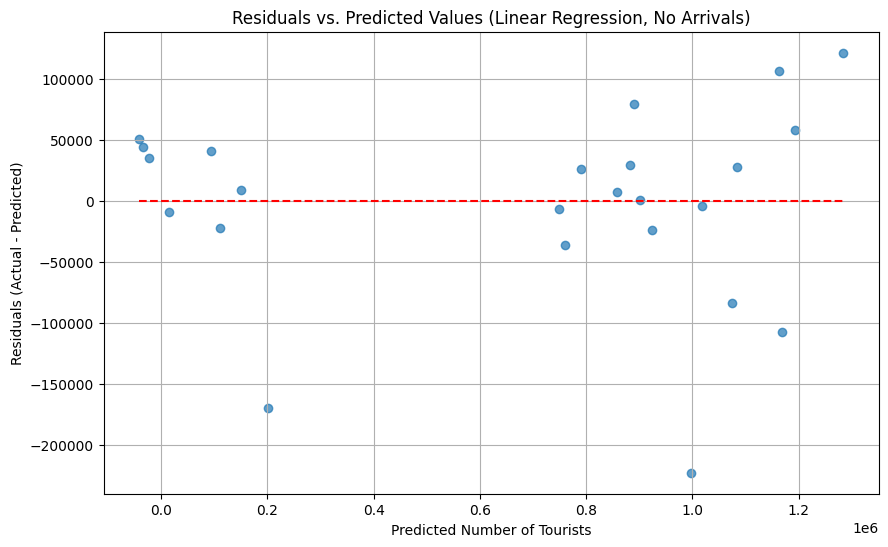

- Observation: Ideally, residuals should be randomly scattered around zero. Look for patterns like funnel shapes (heteroscedasticity) or curves (non-linearity).


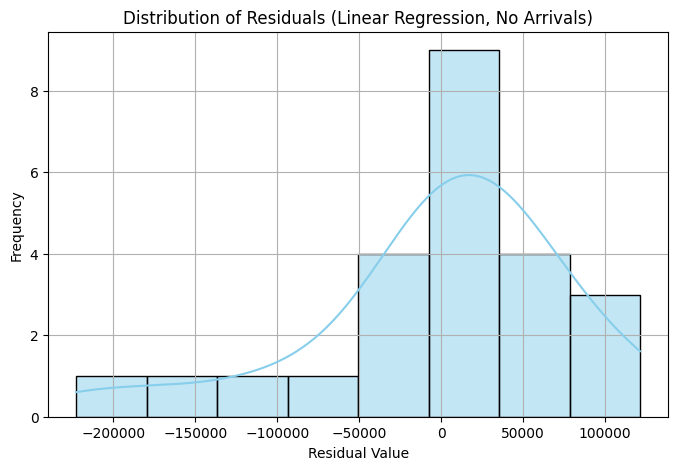

- Observation: Ideally, residuals should be normally distributed (bell-shaped). Check for skewness or multiple peaks.


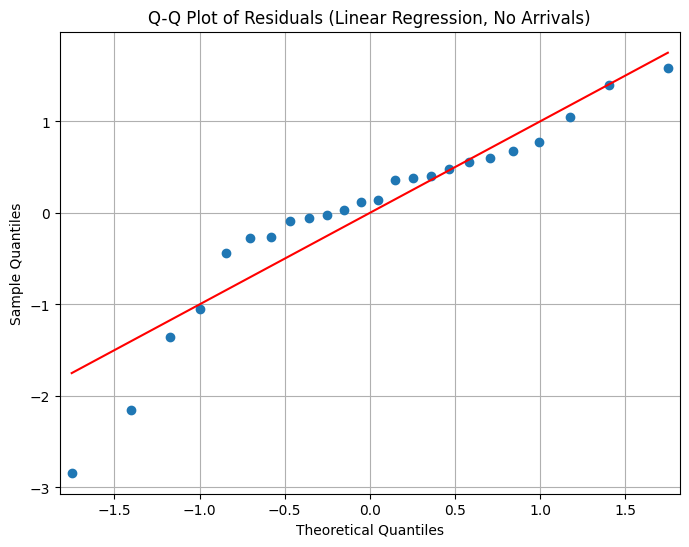

- Observation: Points should closely follow the straight line for normality. Deviations, especially at tails, indicate non-normality.

--- Breusch-Pagan Test for Heteroscedasticity ---
Lagrange multiplier statistic: 24.0000
p-value: 0.7720
f-value: nan
f-p-value: nan
Conclusion: Fail to reject Null Hypothesis. No strong evidence of heteroscedasticity.

--- Normality Tests for Residuals ---
Shapiro-Wilk Test: Statistic=0.9039, p-value=0.0261
Conclusion: Reject Null Hypothesis. Residuals are likely NOT normally distributed.
D'Agostino's K^2 Test: Statistic=9.1006, p-value=0.0106
Conclusion: Reject Null Hypothesis. Residuals are likely NOT normally distributed (skewed or kurtotic).

--- Residual Analysis Complete ---

--- Advanced Feature Engineering (Time Series Aspects) ---
Dropped 12 rows due to NaN values from feature engineering (mostly at the beginning).

New DataFrame with Engineered Features Preview:
         Date  Number of Tourists  Avg Spend per Person (USD)  \
12 2016-01-01   

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR # SVR is included but might be slow or perform poorly without tuning
from sklearn.metrics import mean_squared_error, r2_score

# For statistical tests
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan # For heteroscedasticity test
from scipy.stats import shapiro, normaltest # For normality tests

# --- IMPORTANT: Ensure previous steps (data loading, preprocessing,
# and initial model training with 'Number of Arrivals' excluded) are executed. ---
# The following variables are assumed to be defined from previous cells:
# df (original preprocessed DataFrame with 'Date', 'Number of Tourists', 'Pandemic' etc.)
# target_column (e.g., 'Number of Tourists')
# X_new, y_new (features and target AFTER excluding 'Number of Arrivals')
# X_train_new, X_test_new, y_train_new, y_test_new (train/test split of X_new, y_new)
# scaler_new (StandardScaler fitted on X_train_new)
# X_train_scaled_new, X_test_scaled_new (scaled data)
# model (the LinearRegression model trained on X_train_scaled_new)
# ----------------------------------------------------------------------------------

print("--- Additional Residual Analysis for the current best model (Linear Regression) ---")

# Re-train the Linear Regression model on the data where 'Number of Arrivals' is excluded
# to ensure 'model' variable is the correct one for this residual analysis.
# This step is redundant if you just ran the previous cell which also trains LR,
# but it ensures the model is always correctly defined for this block.
model = LinearRegression()
model.fit(X_train_scaled_new, y_train_new)
y_pred_best_model = model.predict(X_test_scaled_new)
residuals_best_model = y_test_new - y_pred_best_model

# 1. Residuals vs. Predicted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best_model, residuals_best_model, alpha=0.7)
plt.hlines(0, xmin=y_pred_best_model.min(), xmax=y_pred_best_model.max(), colors='red', linestyles='--')
plt.xlabel("Predicted Number of Tourists")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Values (Linear Regression, No Arrivals)")
plt.grid(True)
plt.show()
print("- Observation: Ideally, residuals should be randomly scattered around zero. Look for patterns like funnel shapes (heteroscedasticity) or curves (non-linearity).")

# 2. Distribution of Residuals Plot (Histogram with KDE)
plt.figure(figsize=(8, 5))
sns.histplot(residuals_best_model, kde=True, color='skyblue')
plt.title("Distribution of Residuals (Linear Regression, No Arrivals)")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
print("- Observation: Ideally, residuals should be normally distributed (bell-shaped). Check for skewness or multiple peaks.")

# 3. Q-Q Plot of Residuals (to check for normality more formally)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_best_model, line='s', ax=plt.gca(), fit=True)
plt.title("Q-Q Plot of Residuals (Linear Regression, No Arrivals)")
plt.grid(True)
plt.show()
print("- Observation: Points should closely follow the straight line for normality. Deviations, especially at tails, indicate non-normality.")

# 4. Statistical Tests for Homoscedasticity (Breusch-Pagan Test)
print("\n--- Breusch-Pagan Test for Heteroscedasticity ---")
try:
    # Need to add a constant to the independent variables for statsmodels
    # Use X_test_new which is unscaled but corresponds to y_test_new and residuals.
    # Note: If your features are highly correlated, this test might be unstable.
    bp_test = het_breuschpagan(residuals_best_model, sm.add_constant(X_test_new))
    labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f-p-value']
    bp_results = dict(zip(labels, bp_test))
    for k, v in bp_results.items():
        print(f"{k}: {v:.4f}")

    if bp_results['p-value'] < 0.05:
        print("Conclusion: Reject Null Hypothesis. Evidence of heteroscedasticity (residuals' variance is NOT constant).")
        print("This suggests that the spread of errors is not uniform across all predictions.")
    else:
        print("Conclusion: Fail to reject Null Hypothesis. No strong evidence of heteroscedasticity.")
except Exception as e:
    print(f"Error performing Breusch-Pagan Test: {e}")
    print("This usually happens if the model's independent variables are highly correlated or have zero variance.")

# 5. Statistical Tests for Normality of Residuals (Shapiro-Wilk Test and D'Agostino's K^2 Test)
print("\n--- Normality Tests for Residuals ---")
stat_shapiro, p_shapiro = shapiro(residuals_best_model)
print(f"Shapiro-Wilk Test: Statistic={stat_shapiro:.4f}, p-value={p_shapiro:.4f}")
if p_shapiro < 0.05:
    print("Conclusion: Reject Null Hypothesis. Residuals are likely NOT normally distributed.")
else:
    print("Conclusion: Fail to reject Null Hypothesis. Residuals are likely normally distributed.")

stat_k2, p_k2 = normaltest(residuals_best_model)
print(f"D'Agostino's K^2 Test: Statistic={stat_k2:.4f}, p-value={p_k2:.4f}")
if p_k2 < 0.05:
    print("Conclusion: Reject Null Hypothesis. Residuals are likely NOT normally distributed (skewed or kurtotic).")
else:
    print("Conclusion: Fail to reject Null Hypothesis. Residuals are likely normally distributed.")

print("\n--- Residual Analysis Complete ---")

print("\n--- Advanced Feature Engineering (Time Series Aspects) ---")

# Create a copy of the original preprocessed DataFrame for feature engineering
# Assumes 'df' is available from the very first data loading and preprocessing steps.
df_fe = df.copy()
df_fe = df_fe.sort_values(by='Date') # Ensure data is sorted by date for time-series features

# 1. Lagged features for 'Number of Tourists' (Target variable)
# These features provide information about past tourist counts.
df_fe['Number of Tourists_Lag1'] = df_fe['Number of Tourists'].shift(1) # Previous month
df_fe['Number of Tourists_Lag3'] = df_fe['Number of Tourists'].shift(3) # 3 months ago
df_fe['Number of Tourists_Lag12'] = df_fe['Number of Tourists'].shift(12) # 12 months (previous year's same month)

# 2. Rolling Statistics (e.g., 3-month rolling average and standard deviation of target)
# These can capture short-term trends or volatility.
df_fe['Number of Tourists_RollingMean3'] = df_fe['Number of Tourists'].rolling(window=3).mean()
df_fe['Number of Tourists_RollingStd3'] = df_fe['Number of Tourists'].rolling(window=3).std()

# 3. Simple Trend Feature (numerical representation of time progression)
df_fe['Time_Index'] = np.arange(len(df_fe))

# 4. Interaction Features (Optional, example: Pandemic interaction with Year/Month)
# This could allow the model to learn different effects during pandemic vs non-pandemic.
# df_fe['Pandemic_x_Year'] = df_fe['Pandemic'] * df_fe['Year'] # Example, uncomment if needed
# df_fe['Pandemic_x_Month'] = df_fe['Pandemic'] * df_fe['Month'] # Example, uncomment if needed


# Drop rows with NaN values created by lagging/rolling (usually at the beginning)
# The number of dropped rows depends on the largest lag/rolling window (here, 12 for Lag12).
initial_rows = len(df_fe)
df_fe.dropna(inplace=True)
print(f"Dropped {initial_rows - len(df_fe)} rows due to NaN values from feature engineering (mostly at the beginning).")


print("\nNew DataFrame with Engineered Features Preview:")
print(df_fe.head())
print(f"\nNew DataFrame shape after feature engineering: {df_fe.shape}")


# Now, redefine X and y with the new features for model training
final_excluded_cols = ['Date', target_column, 'Number of Arrivals'] # 'Number of Arrivals' is still excluded
X_fe = df_fe[[col for col in df_fe.columns if col not in final_excluded_cols]].select_dtypes(include=np.number)
y_fe = df_fe[target_column]

print(f"\nFeatures after Feature Engineering (X_fe): {X_fe.columns.tolist()}")
print(f"X_fe shape: {X_fe.shape}, y_fe shape: {y_fe.shape}")


# --- Re-split, re-scale, and train/evaluate models with the new engineered features ---
print("\n--- Training and Evaluating Models with Engineered Features ---")

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42)

scaler_fe = StandardScaler()
X_train_scaled_fe = scaler_fe.fit_transform(X_train_fe)
X_test_scaled_fe = scaler_fe.transform(X_test_fe)

# Define models to re-evaluate with new features
models_fe = {
    'Linear Regression (FE)': LinearRegression(),
    'Random Forest Regressor (FE)': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor (FE)': GradientBoostingRegressor(random_state=42),
    # SVR is often computationally expensive and requires extensive tuning for good performance.
    # It's excluded here for brevity but can be re-added if you plan to tune it.
    # 'Support Vector Regressor (FE)': SVR()
}

results_fe = {}
cv_results_fe = {} # For cross-validation results

# Loop through models for evaluation
for name, model in models_fe.items():
    print(f"\n--- Training {name} ---")

    # 1. Test Set Evaluation
    model.fit(X_train_scaled_fe, y_train_fe)
    y_pred_fe = model.predict(X_test_scaled_fe)
    mse_fe = mean_squared_error(y_test_fe, y_pred_fe)
    r2_fe = r2_score(y_test_fe, y_pred_fe)
    results_fe[name] = {'MSE': mse_fe, 'R2 Score': r2_fe}

    print(f"Test Set Results for {name}: MSE={mse_fe:.2f}, R2 Score={r2_fe:.4f}")

    # 2. K-Fold Cross-Validation
    mse_scores_cv = []
    r2_scores_cv = []
    kf_fe = KFold(n_splits=5, shuffle=True, random_state=42) # Re-initialize KFold for clarity

    for train_index, val_index in kf_fe.split(X_fe):
        X_train_fold, X_val_fold = X_fe.iloc[train_index], X_fe.iloc[val_index]
        y_train_fold, y_val_fold = y_fe.iloc[train_index], y_fe.iloc[val_index]

        # Apply scaling within each fold to prevent data leakage from validation set
        scaler_fold = StandardScaler()
        X_train_scaled_fold = scaler_fold.fit_transform(X_train_fold)
        X_val_scaled_fold = scaler_fold.transform(X_val_fold)

        model_cv = model.__class__(**(model.get_params())) # Create a new instance of the model for each fold
        model_cv.fit(X_train_scaled_fold, y_train_fold)
        y_pred_fold = model_cv.predict(X_val_scaled_fold)

        mse_scores_cv.append(mean_squared_error(y_val_fold, y_pred_fold))
        r2_scores_cv.append(r2_score(y_val_fold, y_pred_fold))

    cv_results_fe[name] = {
        'Mean MSE': np.mean(mse_scores_cv),
        'Std MSE': np.std(mse_scores_cv),
        'Mean R2 Score': np.mean(r2_scores_cv),
        'Std R2 Score': np.std(r2_scores_cv)
    }
    print(f"Cross-Validation Results for {name}: Mean R2 Score={np.mean(r2_scores_cv):.4f} (Std: {np.std(r2_scores_cv):.4f})")
    print(f"Mean MSE={np.mean(mse_scores_cv):.2f} (Std: {np.std(mse_scores_cv):.2f})")


print("\n--- Summary of Model Performances with Engineered Features (Test Set) ---")
results_fe_df = pd.DataFrame(results_fe).T
print(results_fe_df.sort_values(by='R2 Score', ascending=False))

print("\n--- Summary of Model Performances with Engineered Features (Cross-Validation) ---")
cv_results_fe_df = pd.DataFrame(cv_results_fe).T
print(cv_results_fe_df.sort_values(by='Mean R2 Score', ascending=False))

print("\n--- Analysis with Advanced Features Complete ---")

--- Final Model: Linear Regression with Engineered Features ---

--- Linear Regression Model Coefficients (with Engineered Features) ---
                                 Feature    Coefficient
33       Number of Tourists_RollingMean3  376173.765992
24    Duty-Free_Foreigner Count (1K ppl)  257378.753603
2                         Seoul Avg Temp  142759.125599
35                            Time_Index  134457.474370
28                                  Year  131884.393374
19            Seoul Korea_GoogleTrend_TH  111879.480349
9               Incheon Airport Arrivals   57923.879089
25                   WTI Crude Oil (USD)   44445.740249
15           Korea Travel_GoogleTrend_JP   44416.300232
32              Number of Tourists_Lag12   40585.884212
1               Tourism Revenue (1K USD)   39429.929023
34        Number of Tourists_RollingStd3   36607.840162
16          Seoul Tourism_GoogleTrend_JP   30757.443171
5                   Seoul Avg Rainy Days   21293.975599
29                     

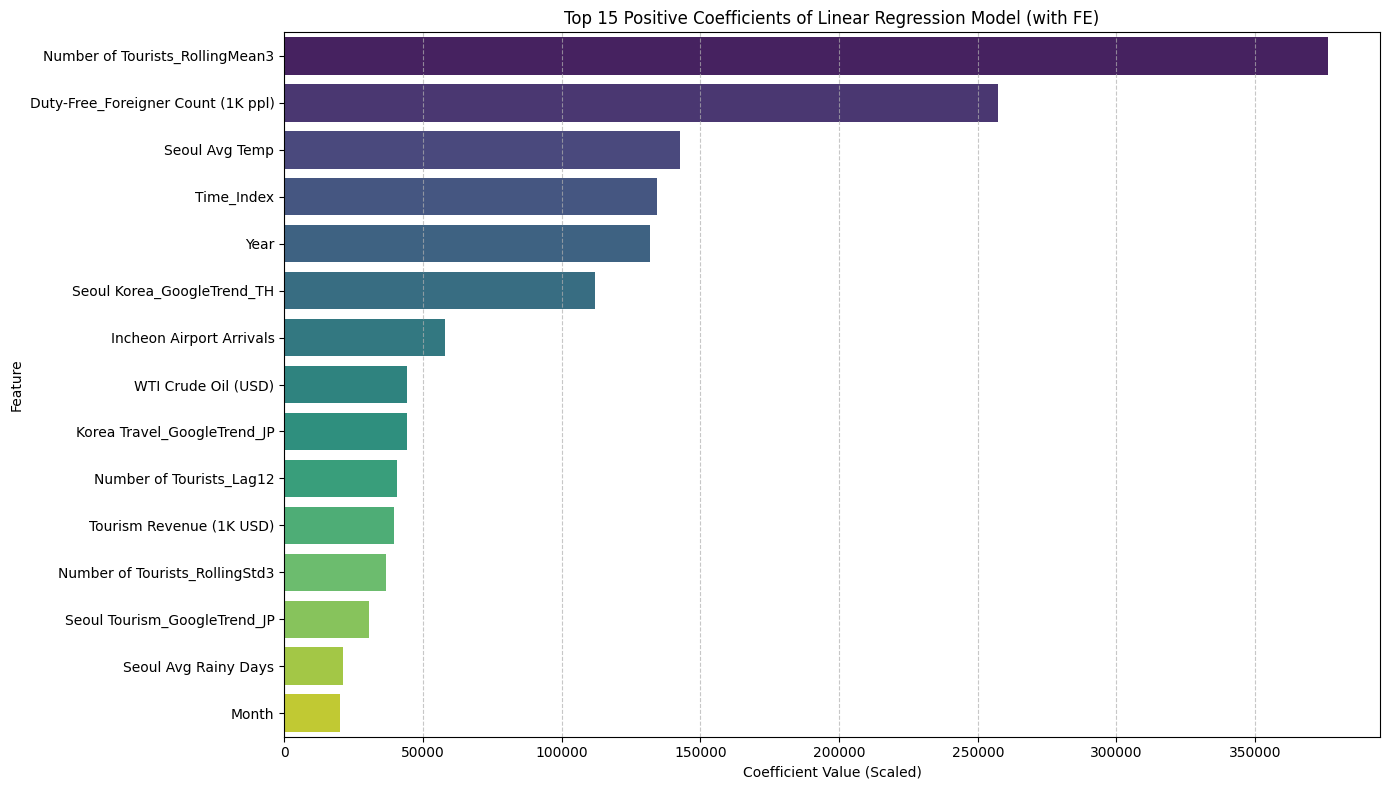

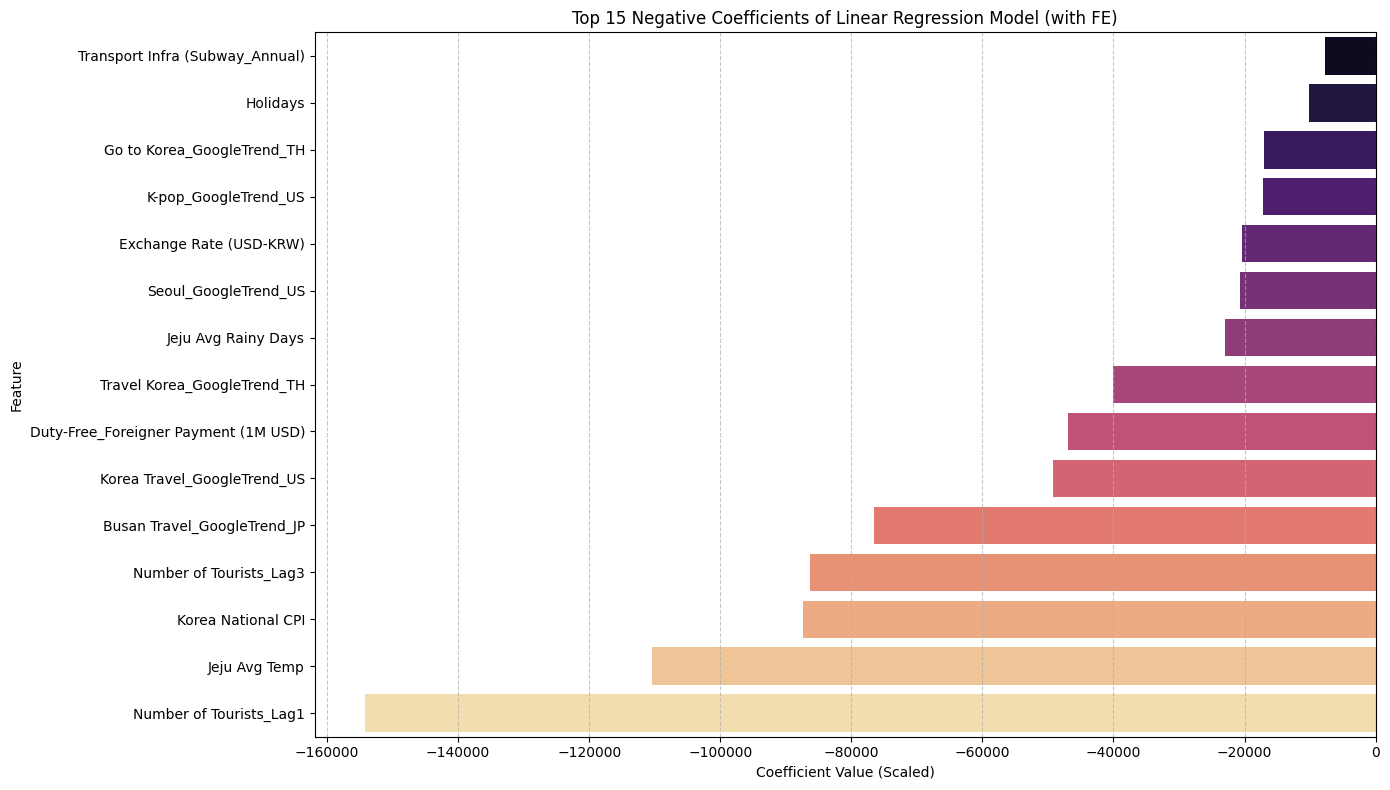


Interpretation Notes:
- The coefficients represent the change in 'Number of Tourists' for a one-unit change in the scaled feature, holding other features constant.
- Since features were scaled, the magnitude of the coefficient indicates the relative importance of the feature.
- Pay special attention to the 'Number of Tourists_Lagged' and 'Rolling' features, as they often have very strong positive coefficients.
- Examine 'Pandemic' coefficient to see its continued impact.

--- Final Model Coefficient Analysis Complete ---


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# --- IMPORTANT: Ensure 'df_fe', 'target_column', 'X_fe', 'y_fe',
# 'X_train_scaled_fe', 'y_train_fe', 'scaler_fe' are available from Cell 4. ---
# If running this cell independently, ensure previous cells are executed.
# -------------------------------------------------------------------------

print("--- Final Model: Linear Regression with Engineered Features ---")

# Re-train the Linear Regression model with engineered features to ensure we have the correct 'model_final' instance
model_final = LinearRegression()
model_final.fit(X_train_scaled_fe, y_train_fe)

# Extract and display coefficients
print("\n--- Linear Regression Model Coefficients (with Engineered Features) ---")
coefficients_fe = pd.DataFrame({'Feature': X_fe.columns, 'Coefficient': model_final.coef_})
coefficients_fe = coefficients_fe.sort_values(by='Coefficient', ascending=False)
print(coefficients_fe)

# Visualize Top 15 Positive Coefficients
plt.figure(figsize=(14, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_fe.head(15), palette='viridis', hue='Feature', legend=False)
plt.title('Top 15 Positive Coefficients of Linear Regression Model (with FE)')
plt.xlabel('Coefficient Value (Scaled)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize Top 15 Negative Coefficients
plt.figure(figsize=(14, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_fe.tail(15), palette='magma', hue='Feature', legend=False)
plt.title('Top 15 Negative Coefficients of Linear Regression Model (with FE)')
plt.xlabel('Coefficient Value (Scaled)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nInterpretation Notes:")
print("- The coefficients represent the change in 'Number of Tourists' for a one-unit change in the scaled feature, holding other features constant.")
print("- Since features were scaled, the magnitude of the coefficient indicates the relative importance of the feature.")
print("- Pay special attention to the 'Number of Tourists_Lagged' and 'Rolling' features, as they often have very strong positive coefficients.")
print("- Examine 'Pandemic' coefficient to see its continued impact.")

print("\n--- Final Model Coefficient Analysis Complete ---")